In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasaexoplanets/cleaned_5250.csv


In [2]:
df = pd.read_csv('/kaggle/input/nasaexoplanets/cleaned_5250.csv')

In [3]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007         19.40000  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Velocity  
1        1.530000        1.400000          0.08  Radial Velocity  
2        0.830000        0.508693          0.00  Radial Velocity  
3        2.773069        4.800000          0.37  Radial Velocity  
4        1.660000        2.200000          0.68  Radial Velocity

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [5]:
df.shape

(5250, 13)

In [6]:
df.isna().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [7]:
def checkDistribution():
    df_arr = ['distance','stellar_magnitude','mass_multiplier','radius_multiplier','orbital_radius','orbital_period']
    for i in df_arr:
        fig, ax = plt.subplots(figsize = (5,3))
        sns.distplot(df[i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a

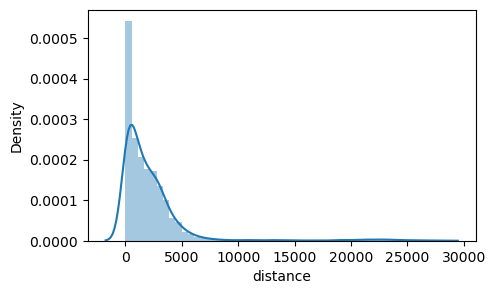

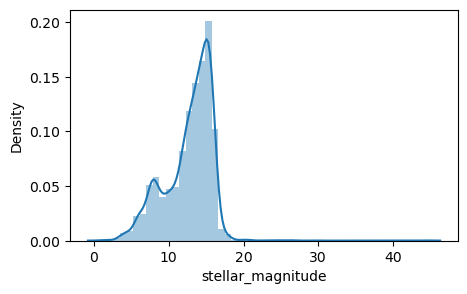

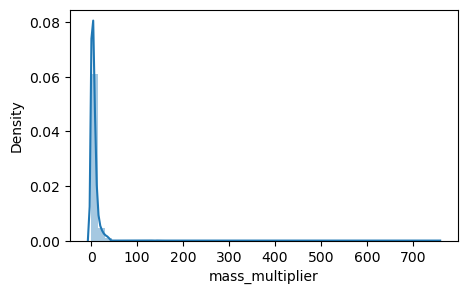

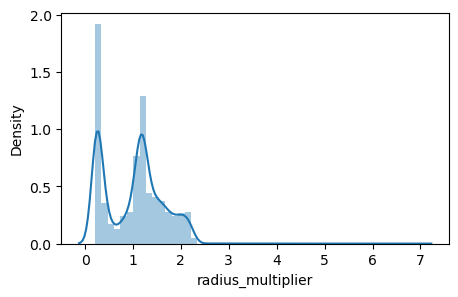

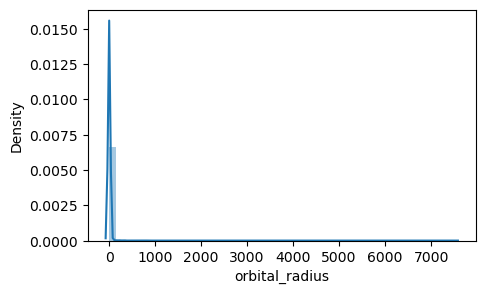

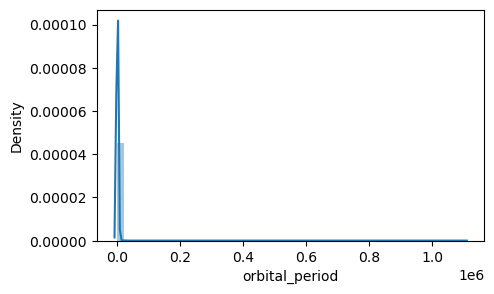

In [8]:
checkDistribution()

##### Fill the data with median cause we see the data have a skewed distribution

In [9]:
median_fill_data = ['distance','stellar_magnitude','radius_multiplier','mass_multiplier','orbital_period','orbital_radius']

for i in median_fill_data:
    df[i] = df[i].fillna(df[i].median())

In [10]:
df.isna().sum()

name                  0
distance              0
stellar_magnitude     0
planet_type           0
discovery_year        0
mass_multiplier       0
mass_wrt             23
radius_multiplier     0
radius_wrt           17
orbital_radius        0
orbital_period        0
eccentricity          0
detection_method      0
dtype: int64

In [11]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
        
df.isna().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

In [12]:
# Define the columns to check for outliers
def checkOutliers():    
    cols = ['distance', 'mass_multiplier','orbital_period', 'radius_multiplier', 'orbital_radius']

# Create boxplots of the selected columns
#     for col in cols:
#         sns.distplot(x=df[col].dropna())
#         plt.title(col)
#         plt.show()

    # Define the upper and lower bounds for outliers based on the IQR method
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print("Outliers in column", col)
        print(outliers)


In [13]:
checkOutliers()

Outliers in column distance
                       name  distance  stellar_magnitude   planet_type  \
109              CoRoT-31 b    6543.0            15.4790     Gas Giant   
380              HAT-P-63 b   14624.0            20.1544     Gas Giant   
1897          Kepler-1078 b    8095.0            15.7030   Super Earth   
1962          Kepler-1125 b    6561.0            15.0420   Super Earth   
2114          Kepler-1239 b    6983.0            15.3910  Neptune-like   
...                     ...       ...                ...           ...   
4740          OGLE-TR-182 b    8161.0            16.9195     Gas Giant   
4785            SWEEPS-11 b   27727.0            19.8300     Gas Giant   
4786             SWEEPS-4 b   27727.0            18.8000     Gas Giant   
5031  UKIRT-2017-BLG-001L b   20551.0            13.5430     Gas Giant   
5234                WTS-1 b    7653.0            16.6440     Gas Giant   

      discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
109

##### In this case, I preferred to fill the outliers with median because if I remove the outliers, the data will be removed almost half of it, so it will be better to keep the data and change the outliers to median value.

In [14]:
# Define the numeric columns
# numeric_cols = ['distance', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier', 'orbital_radius', 'orbital_period', 'eccentricity']

# # Loop over the numeric columns and remove the outliers
# for col in numeric_cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [15]:
def replace_outliers_with_median(df, col):
    # Define the upper and lower bounds for outliers based on the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace the outliers with the median of the column
    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

    return df


In [16]:
cols = ['distance', 'mass_multiplier','orbital_period', 'radius_multiplier', 'orbital_radius']
for col in cols:
    df = replace_outliers_with_median(df, col)


In [17]:
checkOutliers()

Outliers in column distance
               name  distance  stellar_magnitude   planet_type  \
2039  Kepler-1183 b    6260.0             15.968  Neptune-like   
2079  Kepler-1211 b    5958.0             16.016  Neptune-like   
2127  Kepler-1249 b    6213.0             15.391  Neptune-like   
2154  Kepler-1268 b    6005.0             15.484   Super Earth   
2188  Kepler-1294 b    6053.0             15.361  Neptune-like   
2421  Kepler-1468 b    6195.0             15.111   Super Earth   
2422  Kepler-1468 c    6195.0             15.111   Super Earth   
2423  Kepler-1468 d    6195.0             15.111  Neptune-like   
2435  Kepler-1478 b    6020.0             15.409   Super Earth   
2502  Kepler-1527 b    6009.0             15.161  Neptune-like   
2611  Kepler-1609 b    5957.0             15.159  Neptune-like   
2651  Kepler-1640 b    6067.0             14.754  Neptune-like   
2911  Kepler-1844 b    5886.0             15.995  Neptune-like   
3015  Kepler-1924 b    6233.0             15.084

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a

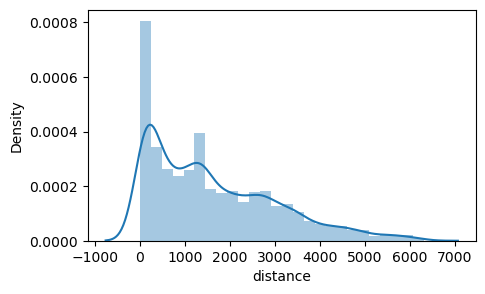

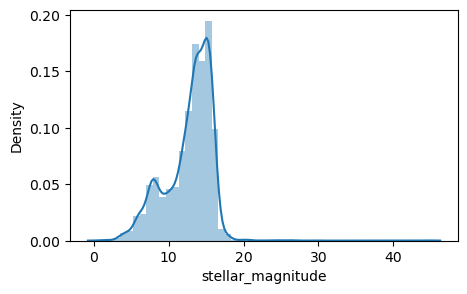

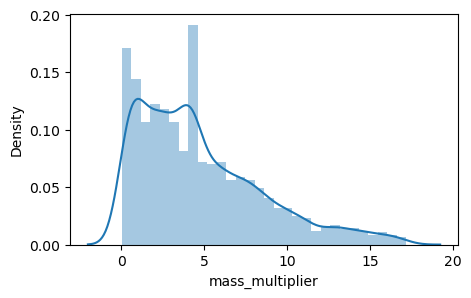

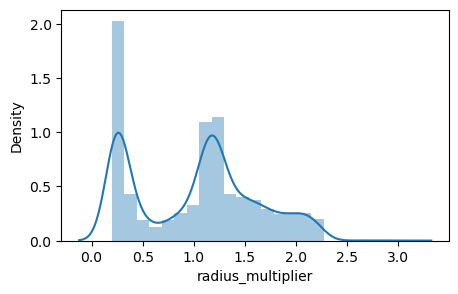

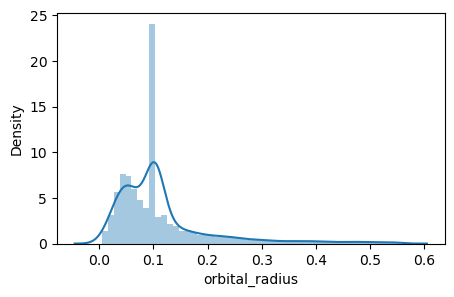

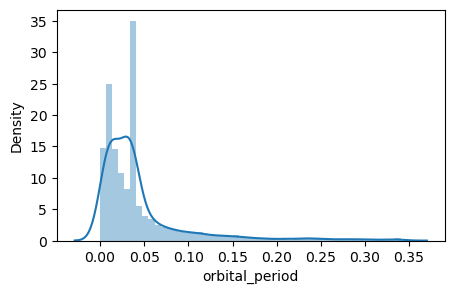

In [18]:
#check the distribution again
checkDistribution()

In [19]:
df.shape

(5250, 13)

## Visualization

In this section, I visualize to know how many planet type that discovered for each year and also visualize the distribution of distance to the exoplanets

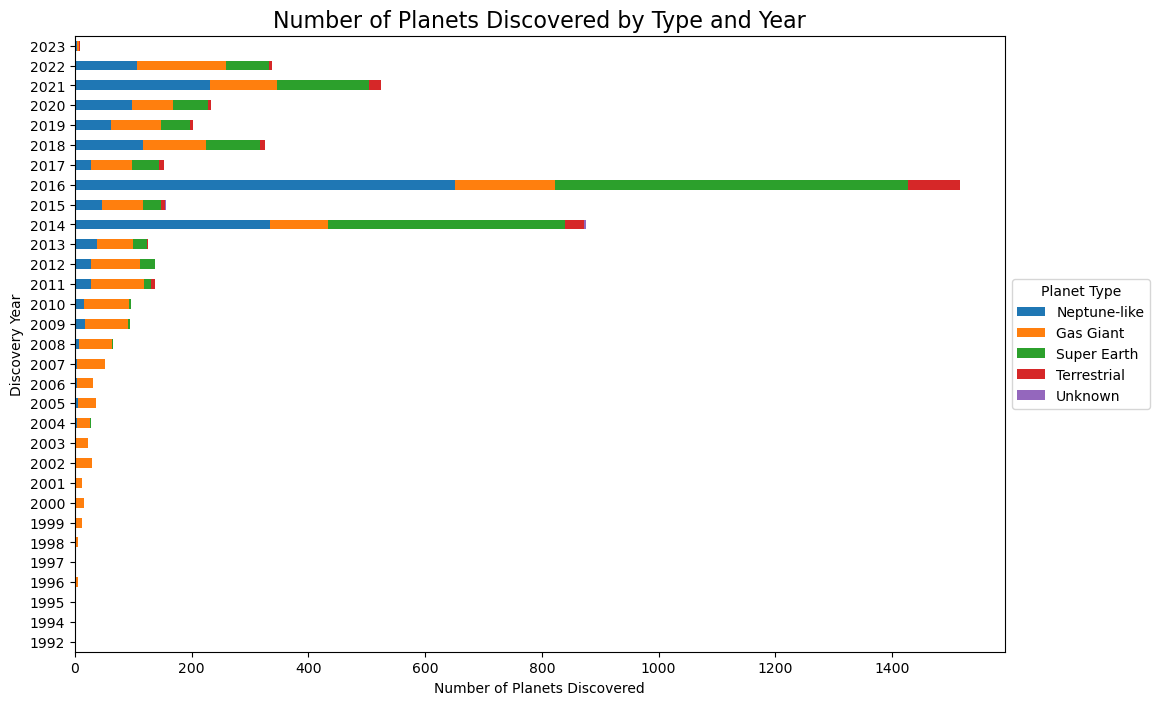

In [20]:
#planet type that discovered for each year
planet_counts = df.groupby(['discovery_year', 'planet_type'])['name'].count().reset_index()
planet_counts.rename(columns={'name': 'count'}, inplace=True)

# Pivot the data to create a wide-form DataFrame with discovery year as the index and planet types as the columns
planet_counts_pivot = planet_counts.pivot(index='discovery_year', columns='planet_type', values='count')

# Sort the columns by the total number of planets discovered in each year
planet_counts_pivot = planet_counts_pivot.loc[:, planet_counts_pivot.sum().sort_values(ascending=False).index]

# Plot a horizontal bar chart of the planet counts
ax = planet_counts_pivot.plot(kind='barh', stacked=True, figsize=(12, 8))
ax.set_xlabel('Number of Planets Discovered')
ax.set_ylabel('Discovery Year')
plt.title('Number of Planets Discovered by Type and Year',fontsize=16)
ax.legend(title='Planet Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Text(0.5, 1.0, 'Distribution of Distance to Exoplanets')

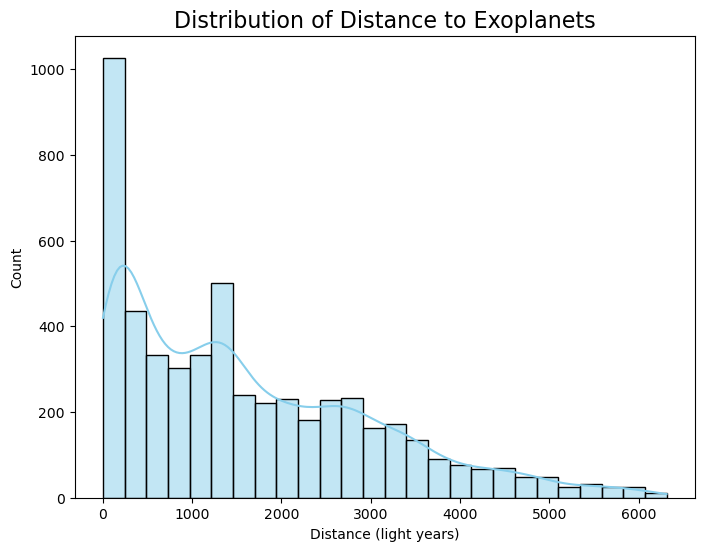

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram with seaborn
sns.histplot(data=df, x='distance', kde=True, ax=ax, color='skyblue')

# Set labels and title
ax.set_xlabel('Distance (light years)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Distance to Exoplanets', fontsize=16)

# Correlation

In this section, as before we used df.corr() to find the correlation, now we want to visualize them with scatter plot and also linear regression plot so we can see every correlation from our data clearly.

In [22]:
df.corr()

distance  stellar_magnitude  discovery_year  \
distance           1.000000           0.601128        0.053940   
stellar_magnitude  0.601128           1.000000        0.214011   
discovery_year     0.053940           0.214011        1.000000   
mass_multiplier    0.113580           0.042794        0.099302   
radius_multiplier -0.077488          -0.045720       -0.070066   
orbital_radius     0.120061          -0.023512       -0.031730   
orbital_period     0.084290          -0.017158       -0.025080   
eccentricity      -0.334401          -0.469929       -0.152491   

                   mass_multiplier  radius_multiplier  orbital_radius  \
distance                  0.113580          -0.077488        0.120061   
stellar_magnitude         0.042794          -0.045720       -0.023512   
discovery_year            0.099302          -0.070066       -0.031730   
mass_multiplier           1.000000          -0.430149        0.232770   
radius_multiplier        -0.430149           1.000000       -0.206532   
orbital_radius            0.232770          -0.206532        1.000000   
orbital_period            0.232172          -0.196248        0.826303   
eccentricity              0.001268           0.026179        0.065671   

                   orbital_period  eccentricity  
distance                 0.084290     -0.334401  
stellar_magnitude       -0.017158     -0.469929  
discovery_year          -0.025080     -0.152491  
mass_multiplier          0.232172      0.001268  
radius_multiplier       -0.196248      0.026179  
orbital_radius           0.826303      0.065671  
orbital_period           1.000000      0.047545  
eccentricity             0.047545      1.000000

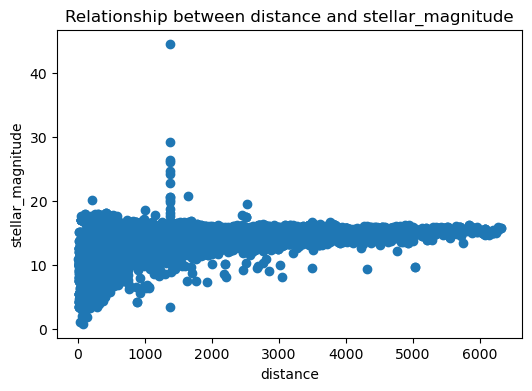

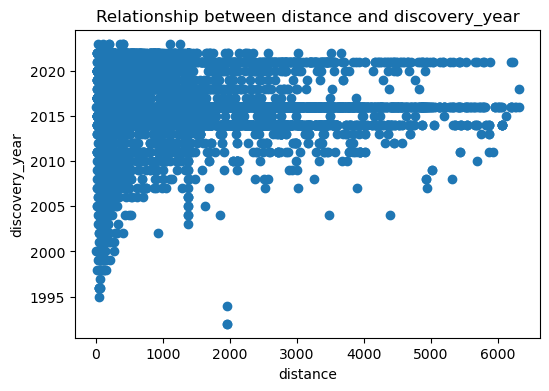

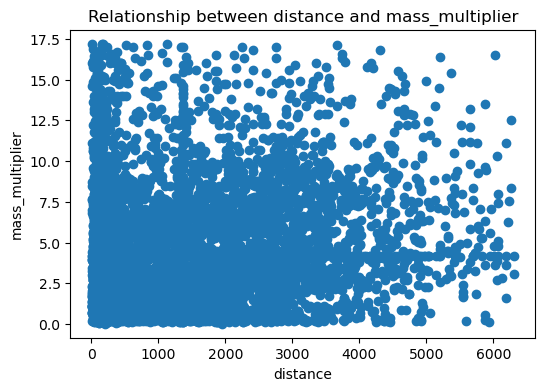

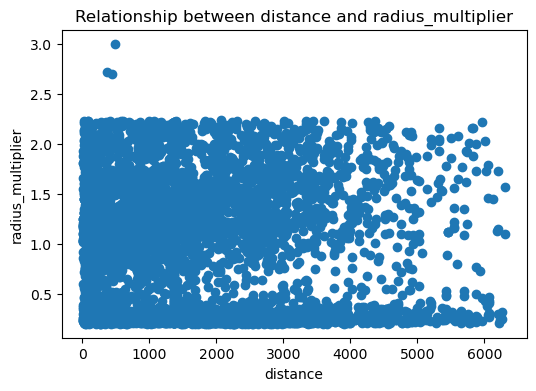

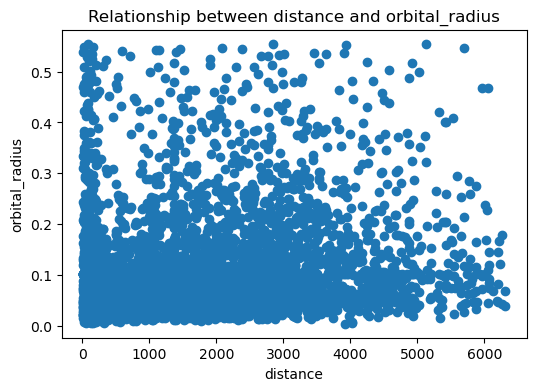

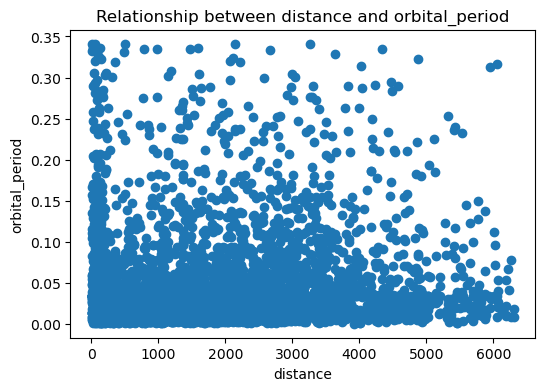

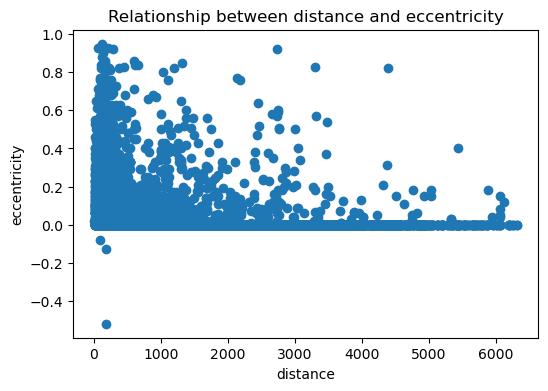

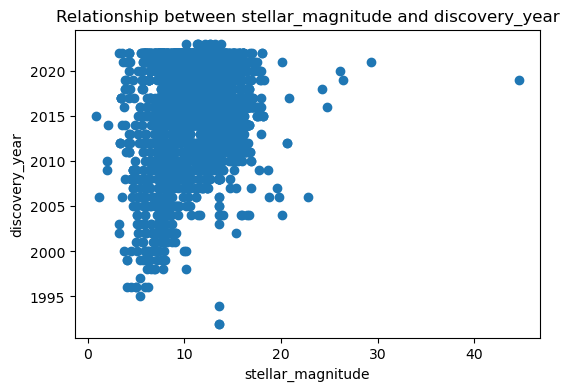

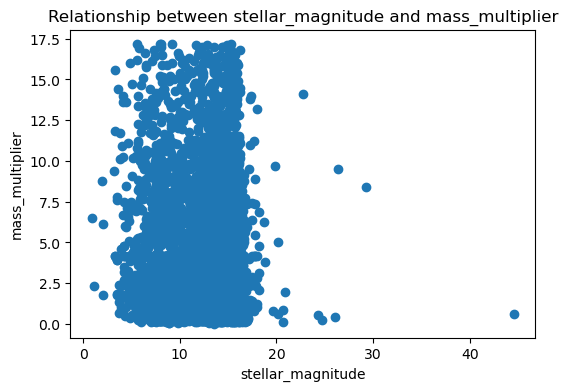

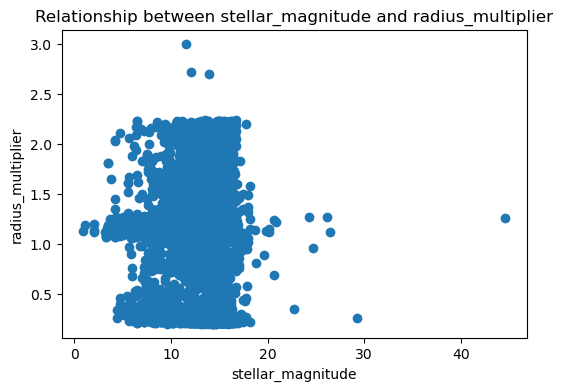

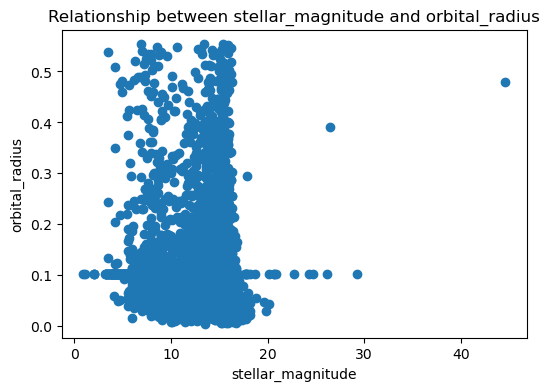

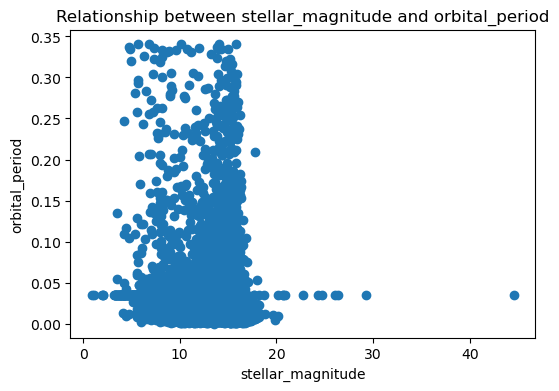

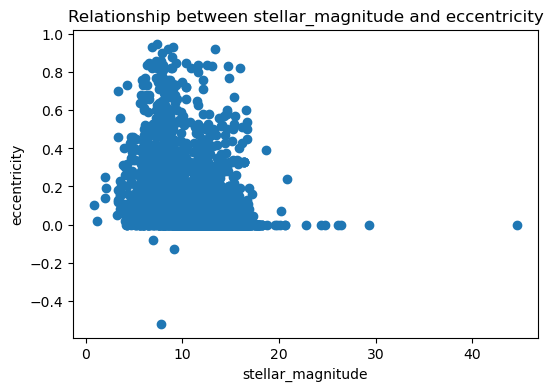

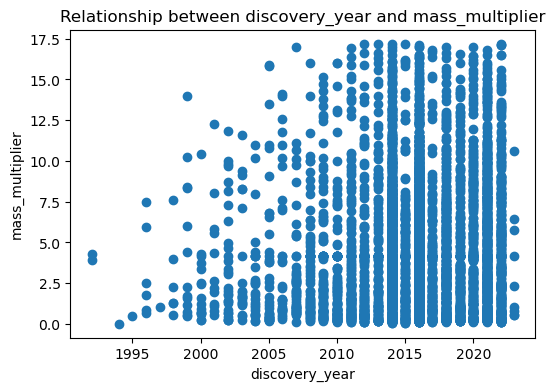

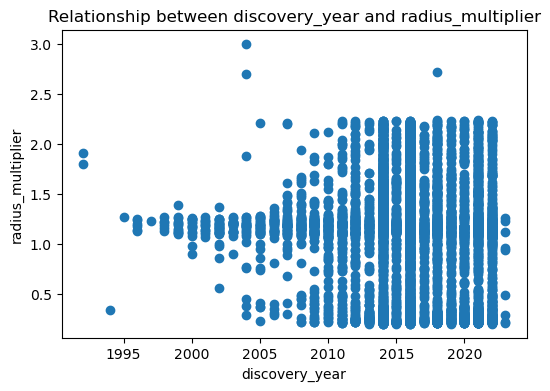

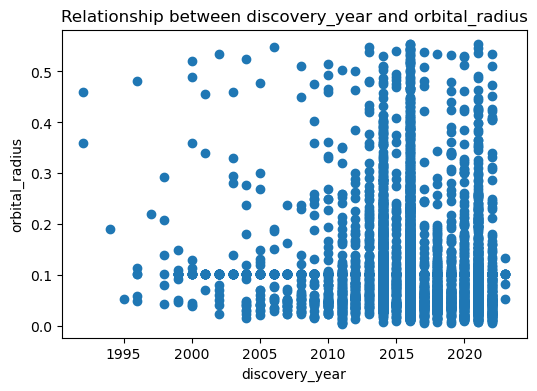

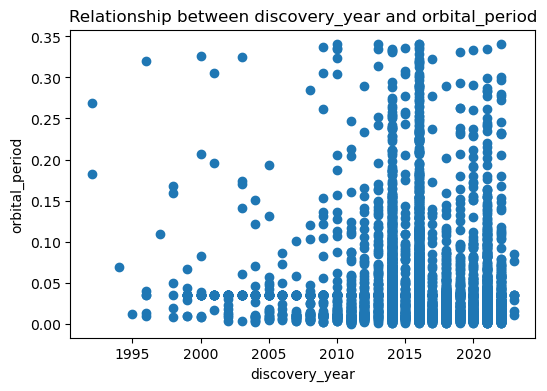

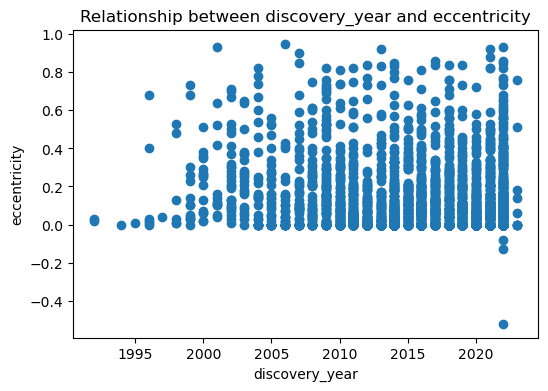

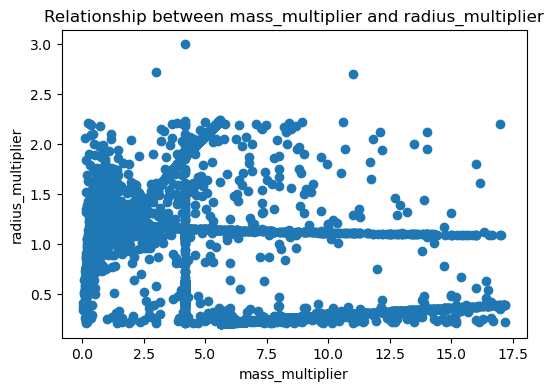

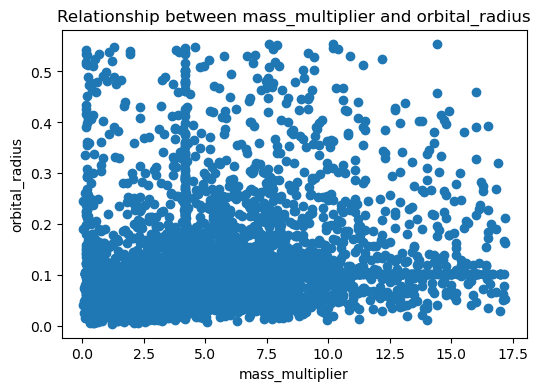

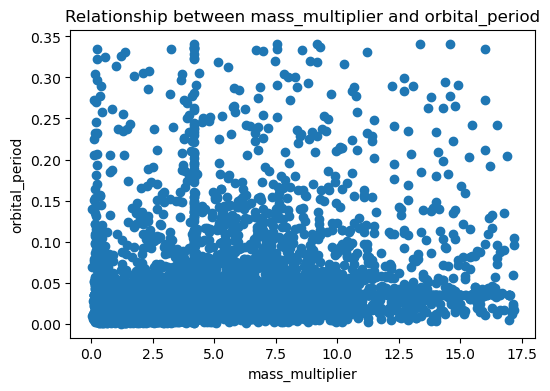

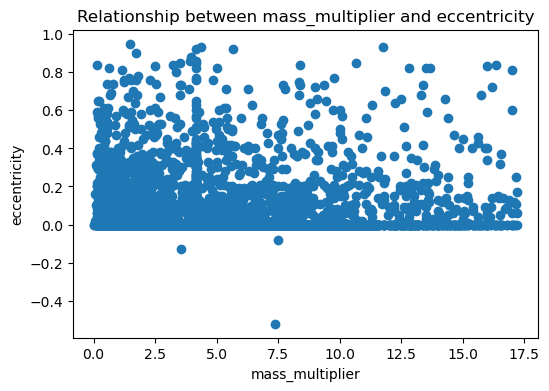

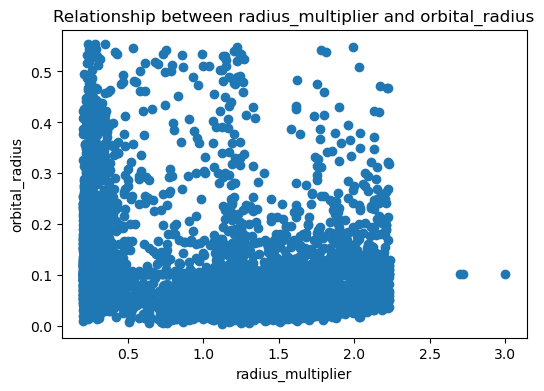

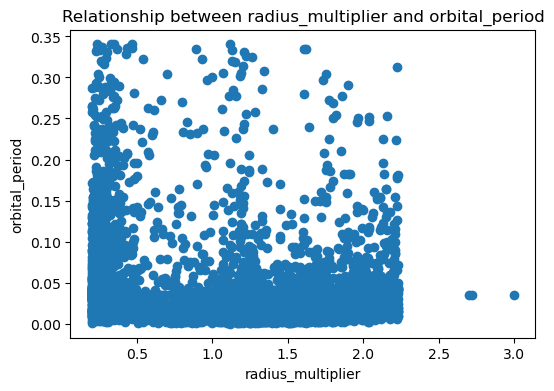

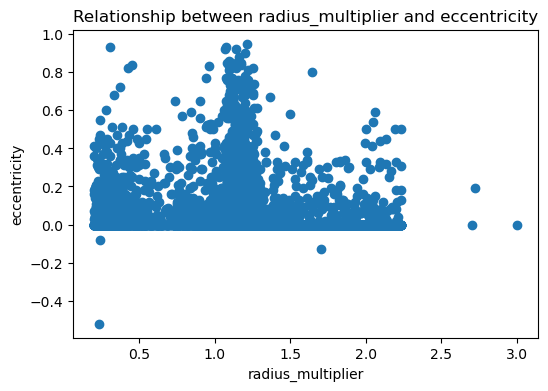

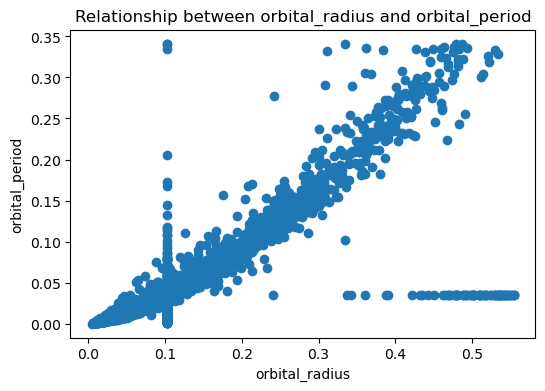

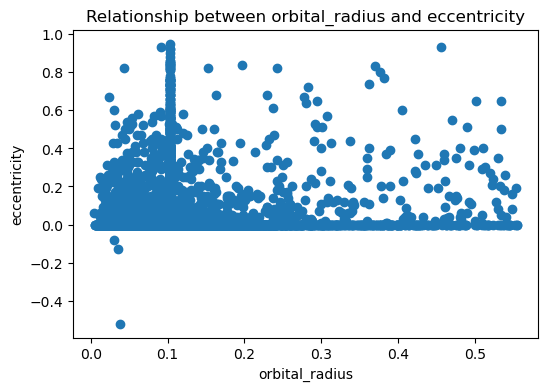

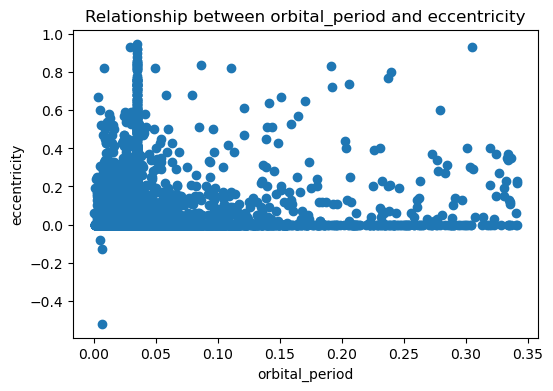

In [23]:
columns = list(df.columns)

# Remove any non-numeric columns
numeric_columns = []
for column in columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        numeric_columns.append(column)

# Create scatter plots for all pairs of numeric columns
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        fig, ax = plt.subplots(figsize=(6,4))
        x = df[numeric_columns[i]]
        y = df[numeric_columns[j]]
        plt.scatter(x, y)
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.title(f'Relationship between {numeric_columns[i]} and {numeric_columns[j]}')
        plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
regression_model = LinearRegression()

# Fit the model to the data
X = df['orbital_radius'].values.reshape(-1, 1)
y = df['orbital_period'].values.reshape(-1, 1)
regression_model.fit(X, y)

# Print the coefficient and intercept of the model
print('Coefficient: ', regression_model.coef_[0][0])
print('Intercept: ', regression_model.intercept_[0])


Coefficient:  0.4823387176527063
Intercept:  -0.010753769666343248


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


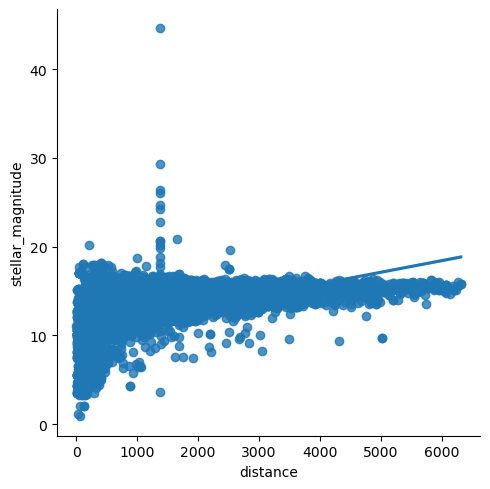

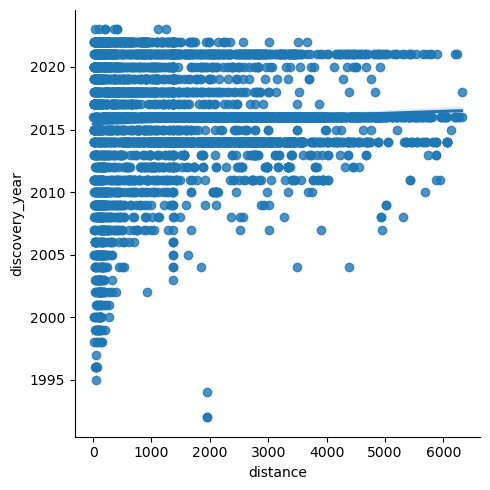

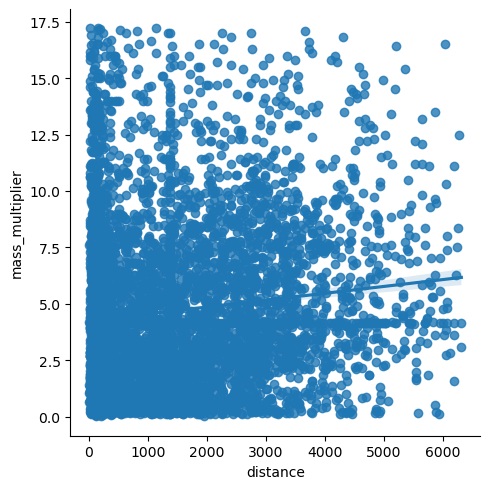

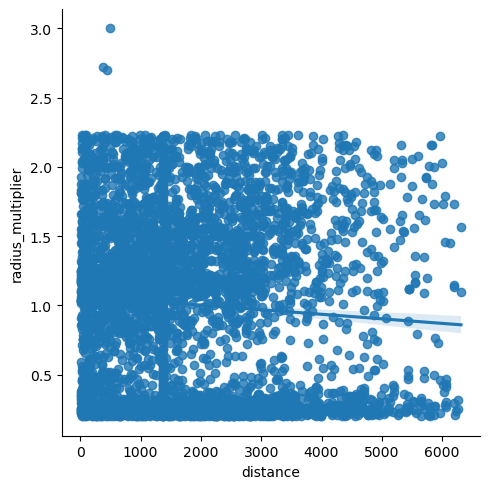

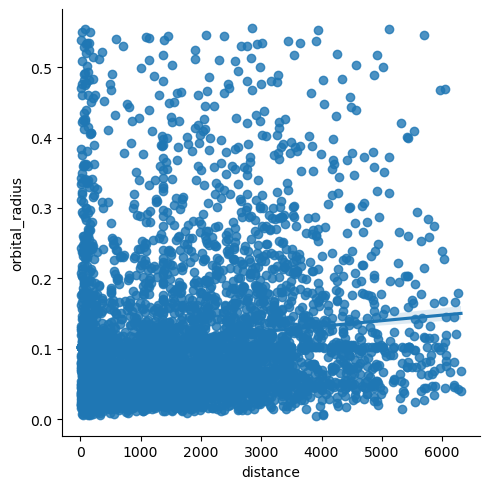

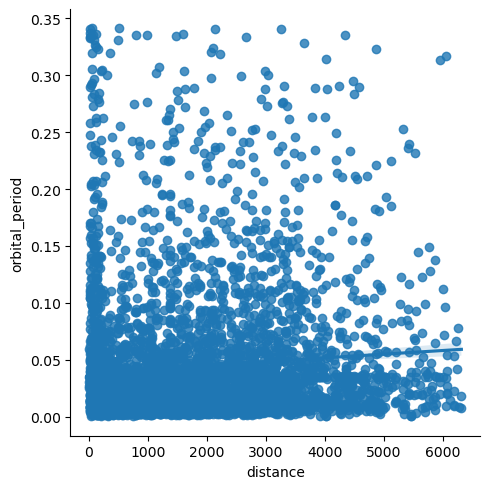

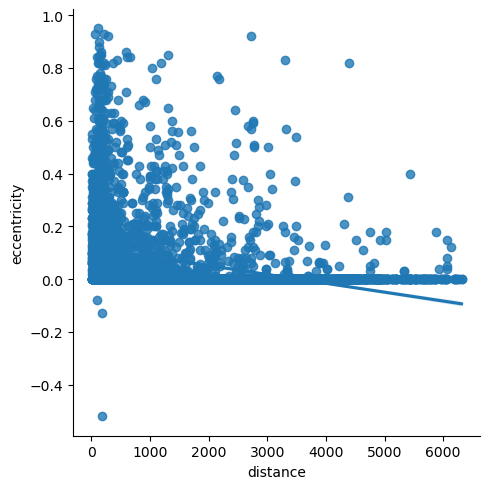

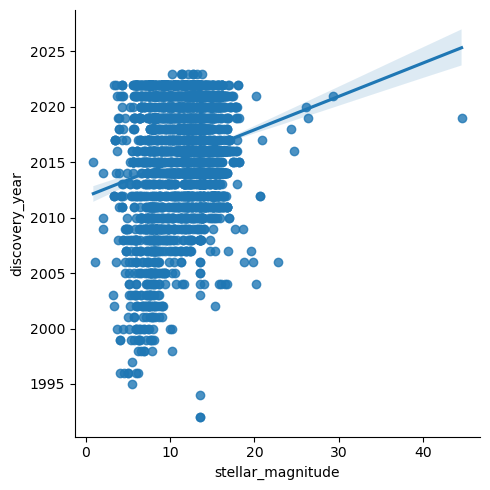

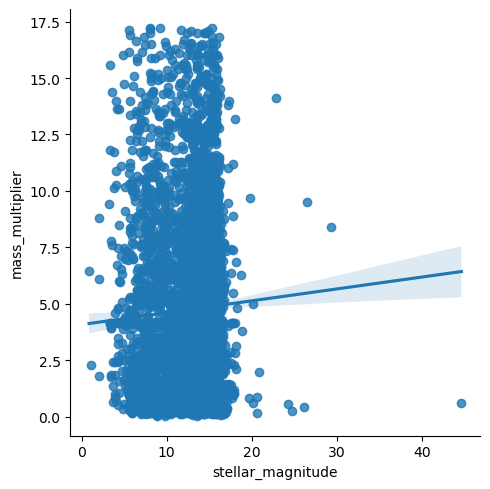

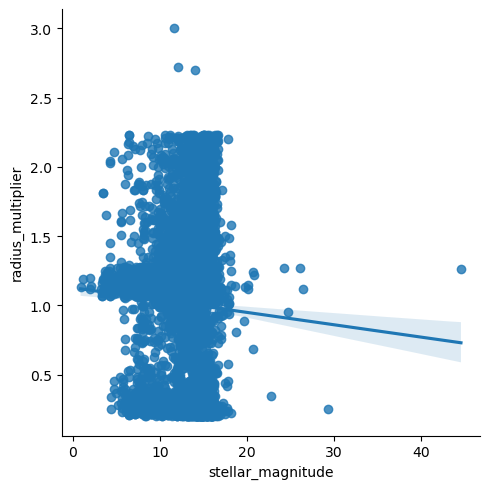

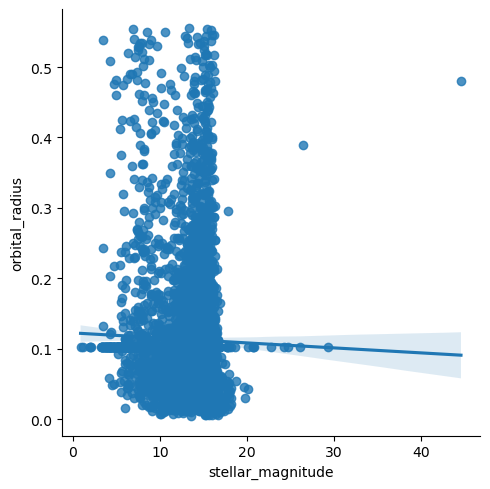

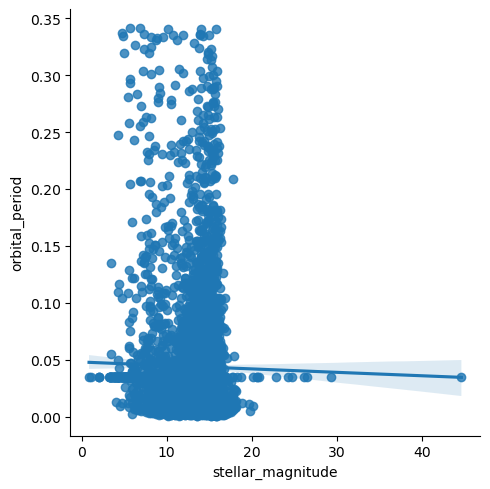

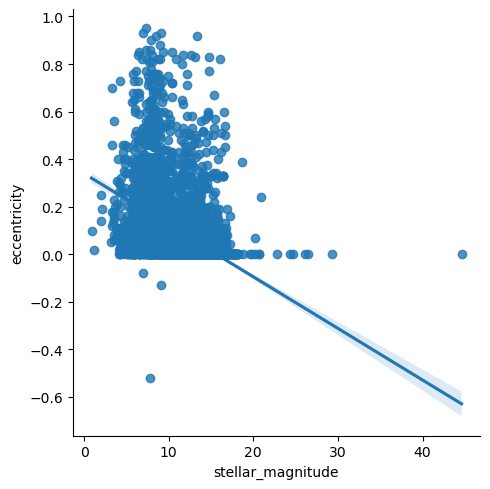

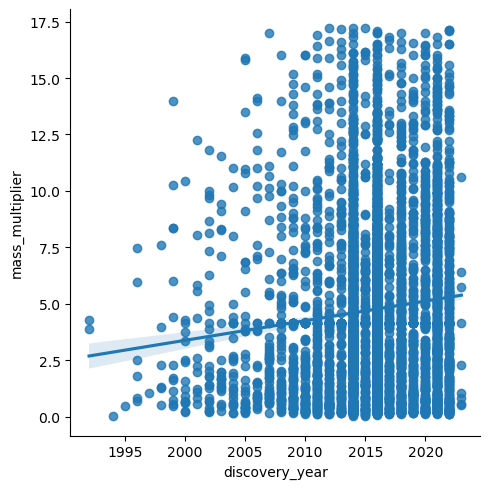

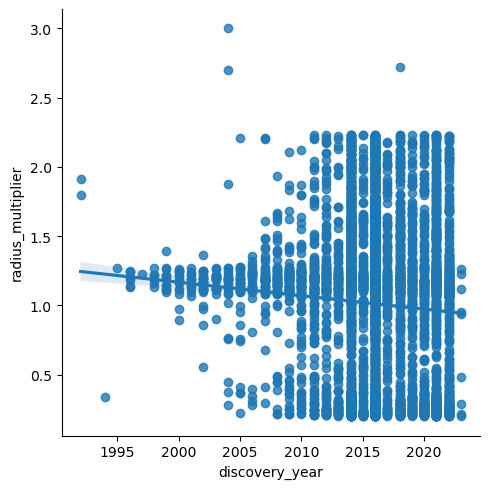

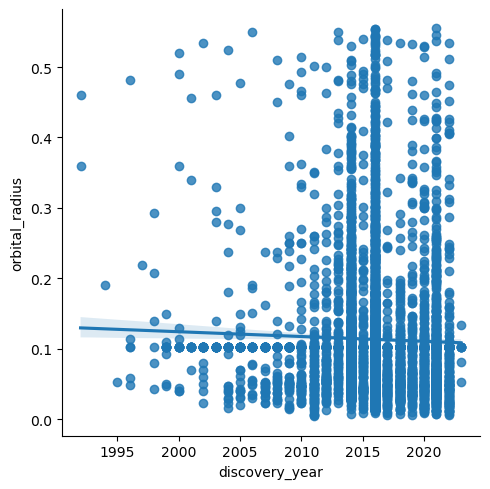

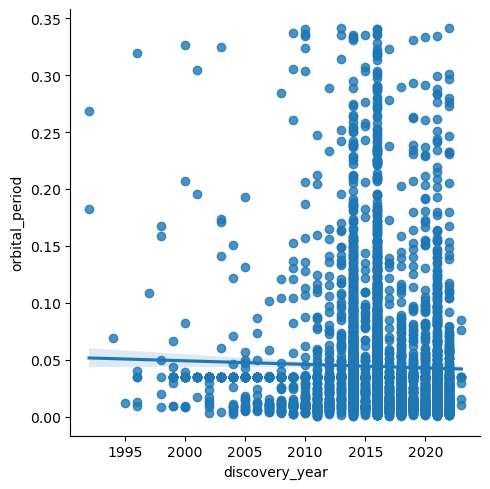

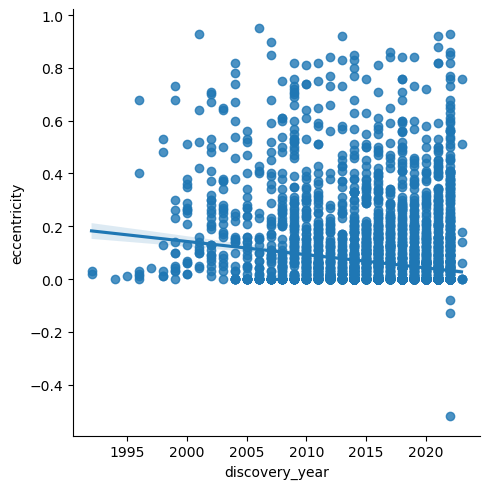

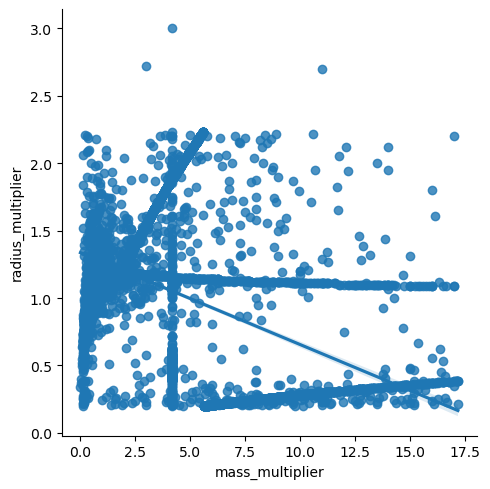

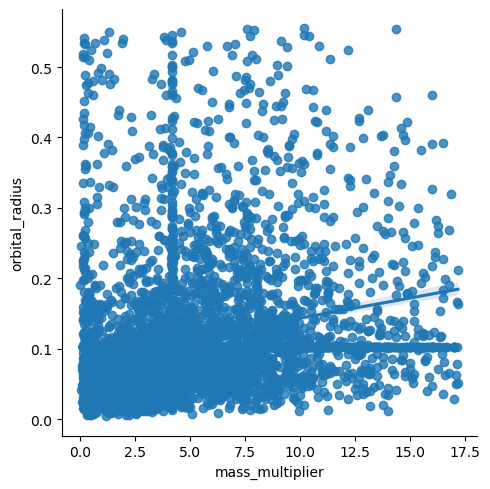

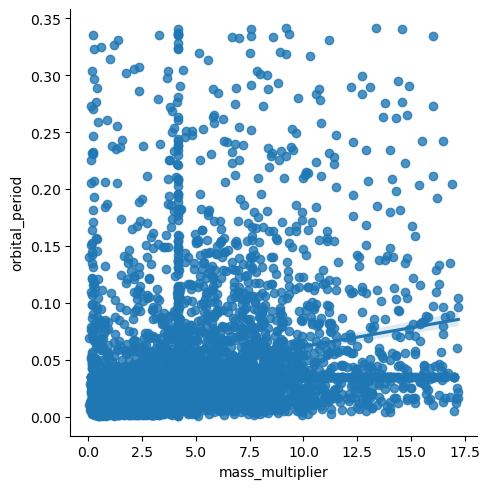

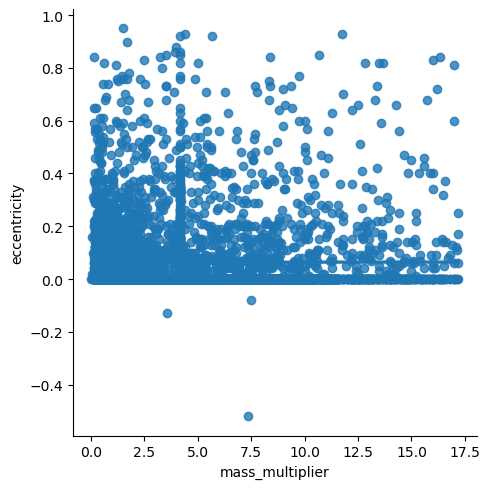

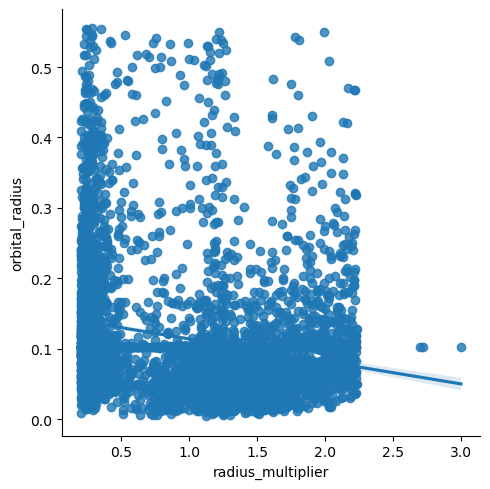

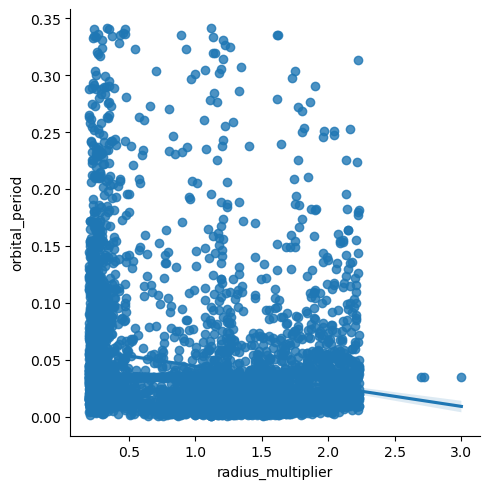

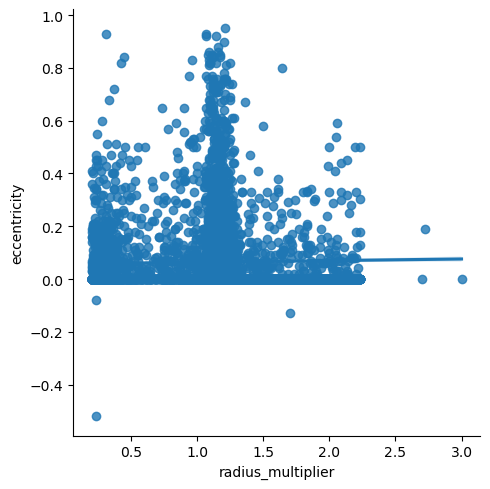

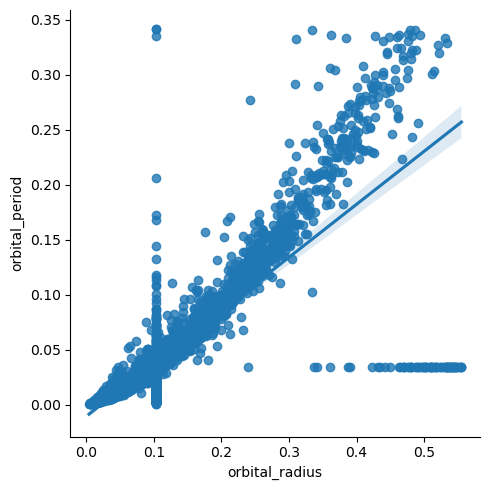

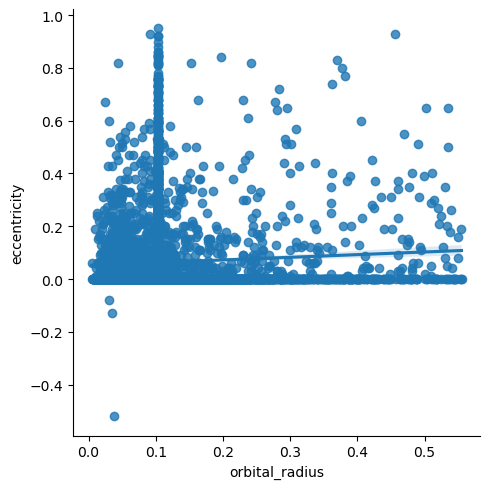

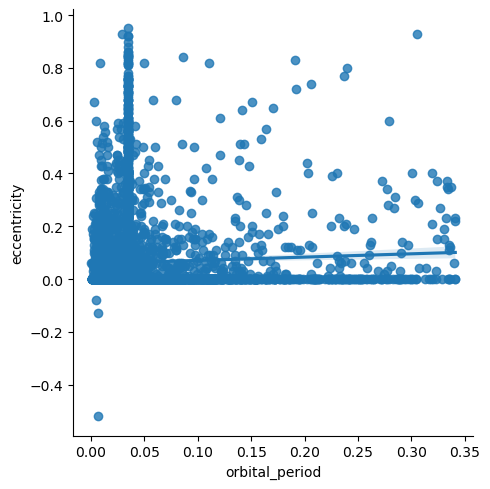

In [25]:
num_cols = df.select_dtypes(include='number').columns

# Loop through each pair of numerical columns
for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):
        if i < j:
            # Create a scatter plot with a regression line
            sns.lmplot(x=col1, y=col2, data=df)

## Featured Engineering

In [26]:
# Import gravitational constant
from scipy.constants import G

# Add a new column for surface gravity
df['surface_gravity'] = (G * df['mass_multiplier'] / (df['radius_multiplier'] * 695700)) / 9.81

# Add a new column for temperature
df['temperature'] = df['stellar_magnitude'] * ((1 - 0.3) / (4 * (df['distance'] * 3.26) ** 2)) ** 0.25

# Add a new column for planet habitability
df['is_habitable'] = ((df['surface_gravity'] > 0.8) & (df['surface_gravity'] < 1.2) & 
                      (df['temperature'] > 0) & (df['temperature'] < 100)).astype(int)

# Add a new column for planet size
df['size'] = (df['mass_multiplier'] * (df['radius_multiplier'] * 695700) ** 2) ** (1/3)

# Add a new column for planet density
df['density'] = df['mass_multiplier'] / (4/3 * 3.14159265359 * (df['radius_multiplier'] * 695700) ** 3)


In [27]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007          4.17014  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  \
0          0.1028        0.034497          0.23  Radial Velocity   
1          0.1028        0.034497          0.08  Radial Velocity   
2          0.1028        0.034497          0.00  Radial Velocity   
3          0.1028        0.034497          0.37  Radial Velocity   
4          0.1028        0.034497          0.68  Radial Velocity   

   surface_gravity  temperature  is_habitable          size       density  
0     3.776084e-17     0.097037             0  13302.932405  2.347063e-18  
1     1.322470e-16     0.088795             0  20389.104983  8.069811e-18  
2     4.081860e-17     0.119480             0  14537.631013  2.237655e-18  
3     7.106530e-17     0.311352             0  17032.575421  4.107260e-18  
4     1.450619e-17     0.268020             0  10745.059723  7.303342e-19

In [28]:
# Select the columns to be used for PCA
columns = ['distance', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier',
           'orbital_radius', 'orbital_period', 'eccentricity', 'surface_gravity', 'temperature',
           'is_habitable']

# Create a new DataFrame with the selected columns
df_pca = df[columns]

# Replace missing values with the mean of each column
df_pca.fillna(df_pca.mean(), inplace=True)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca)

# Add the PCA results to the original DataFrame
df['pca_1'] = pca_result[:,0]
df['pca_2'] = pca_result[:,1]


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007          4.17014  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  \
0          0.1028        0.034497          0.23  Radial Velocity   
1          0.1028        0.034497          0.08  Radial Velocity   
2          0.1028        0.034497          0.00  Radial Velocity   
3          0.1028        0.034497          0.37  Radial Velocity   
4          0.1028        0.034497          0.68  Radial Velocity   

   surface_gravity  temperature  is_habitable          size       density  \
0     3.776084e-17     0.097037             0  13302.932405  2.347063e-18   
1     1.322470e-16     0.088795             0  20389.104983  8.069811e-18   
2     4.081860e-17     0.119480             0  14537.631013  2.237655e-18   
3     7.106530e-17     0.311352             0  17032.575421  4.107260e-18   
4     1.450619e-17     0.268020             0  10745.059723  7.303342e-19   

         pca_1      pca_2  
0 -1329.358762   0.051397  
1 -1224.355256  10.550458  
2 -1387.357848   0.670699  
3 -1575.354868   4.000549  
4 -1564.357352  -2.332071

In [30]:
# Select the columns to be used as input features (including the PCA columns)
columns = ['planet_type','distance', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier',
           'orbital_radius', 'orbital_period', 'eccentricity', 'surface_gravity', 'temperature',
           'is_habitable', 'pca_1', 'pca_2']

# Create a new DataFrame with the selected columns
df_model = df[columns]

# Replace missing values with the mean of each column
df_model.fillna(df_model.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('planet_type', axis=1), 
                                                    df_model['planet_type'], 
                                                    test_size=0.2, random_state=42)

# Train a random forest classifier using the PCA columns as input features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
accuracy = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Accuracy: 94.57%
